In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
book_data = pd.read_csv("/content/books_data.csv")
book_ratings = pd.read_csv("/content/Books_rating.csv")

Displaying the two Dataframes

In [3]:
book_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [4]:
book_ratings.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [5]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


Cleaning the Data and Pre-Processing

In [6]:
#Finding Null Values and percentage of Null Values
print(book_data.isnull().sum())
print("\n")
print((book_data.isnull().sum()/(len(book_data)))*100)

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64


Title             0.000471
description      32.222557
authors          14.789270
image            24.516958
previewLink      11.222011
publisher        35.727199
publishedDate    11.913617
infoLink         11.222011
categories       19.396527
ratingsCount     76.576712
dtype: float64


In [7]:
# Replace NaN values in multiple columns at once using a dictionary
book_data.fillna({
    'description': 'Unknown',
    'authors': 'Unknown',
    'image': 'Unknown',
    'previewLink': 'Unknown',
    'publisher': 'Unknown',
    'publishedDate': 'Unknown',
    'infoLink': 'Unknown',
    'categories': 'Unknown'
}, inplace=True)

print('NaN values replaced with "Unknown".')

NaN values replaced with "Unknown".


In [8]:
book_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,Unknown,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,Unknown,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,Unknown,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",Unknown,['Edward Long'],Unknown,http://books.google.nl/books?id=399SPgAACAAJ&d...,Unknown,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,Unknown,NaN


In [9]:
book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [10]:
#Finding Null Values and percentage of Null Values for Book Ratings
print(book_ratings.isnull().sum())
print("\n")
print((book_ratings.isnull().sum()/(len(book_ratings)))*100)

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64


Id                     0.000000
Title                  0.006933
Price                 83.960967
User_id               18.726233
profileName           18.730167
review/helpfulness     0.000000
review/score           0.000000
review/time            0.000000
review/summary         0.013567
review/text            0.000267
dtype: float64


In [11]:
#Merging the dataframes
merged = pd.merge(book_data, book_ratings, on = 'Title')

In [12]:
merged.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,Its Only Art If Its Well Hung!,Unknown,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,Unknown,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,1882931173,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [13]:
#Dropping Cols which seem to be less important
merged.drop(columns= 'review/time', inplace = True)
merged.drop(columns = 'Price', inplace = True)
merged.drop(columns = 'image', inplace = True)
merged.drop(columns = 'previewLink', inplace = True)
merged.drop(columns = 'infoLink', inplace = True)

In [14]:
#Feature Engineering
merged['ratingsCount'] = merged.groupby('Id')['Id'].transform('count')

In [15]:
merged['avgRating'] = merged.groupby('Id')['review/score'].transform('mean')
merged.head(5)

,Title,description,authors,publisher,publishedDate,categories,ratingsCount,Id,User_id,profileName,review/helpfulness,review/score,review/summary,review/text,avgRating
0,Its Only Art If Its Well Hung!,Unknown,['Julie Strain'],Unknown,1996,['Comics & Graphic Novels'],1,1882931173,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,4.000000
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],9,0826414346,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,4.555556
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],9,0826414346,A3UH4UZ4RSVO82,John Granger,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",4.555556
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],9,0826414346,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",4.555556
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],9,0826414346,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,4.555556


In [16]:
#Taking the subset of original data
subset = merged.sample(n = 50000, random_state= 42)
print(subset)

                                                     Title  \
2945667  A Christmas Carol, in Prose: Being a Ghost Sto...   
2352586                                Priest Kings of Gor   
1531260  Earth Angels: A Pocket Guide for Incarnated An...   
941910                       The Fascinating King's Gambit   
2582125  THE RED BADGE OF COURAGE: AN EPISODE OF THE AM...   
...                                                    ...   
1333972                              Operations Management   
62331                                             Betrayed   
1229382                                  Little fur family   
1298893                                Crime & punishment;   
2862993  The Fabric of the Cosmos: Space, Time, and the...   

                                               description  \
2945667                                            Unknown   
2352586      "40th anniversary of the Gorean saga"--Cover.   
1531260                                            Unknown   
941910 

In [17]:
#Differentiating categorical and numerical variables
cat_cols=subset.select_dtypes(include=['object']).columns
num_cols = subset.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Title', 'description', 'authors', 'publisher', 'publishedDate',
       'categories', 'Id', 'User_id', 'profileName', 'review/helpfulness',
       'review/summary', 'review/text'],
      dtype='object')
Numerical Variables:
['ratingsCount', 'review/score', 'avgRating']


ratingsCount
Skew : 3.37


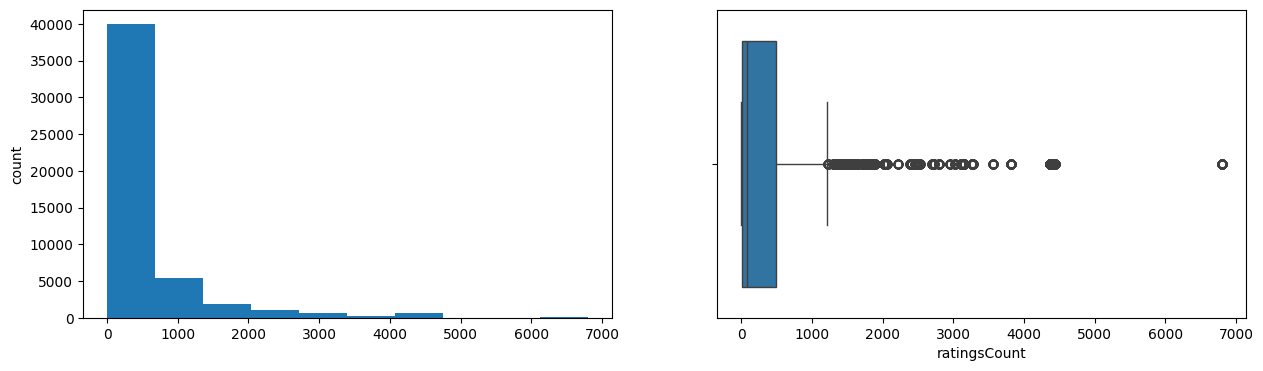

review/score
Skew : -1.51


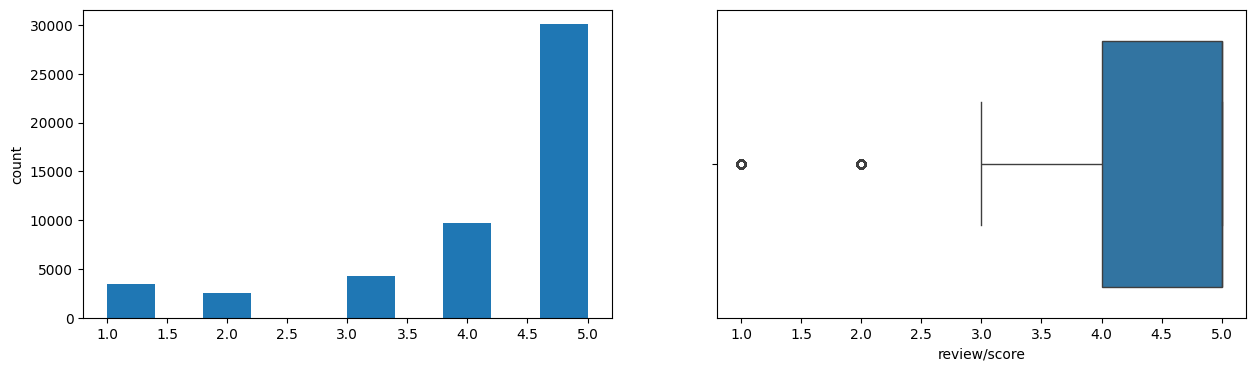

avgRating
Skew : -1.45


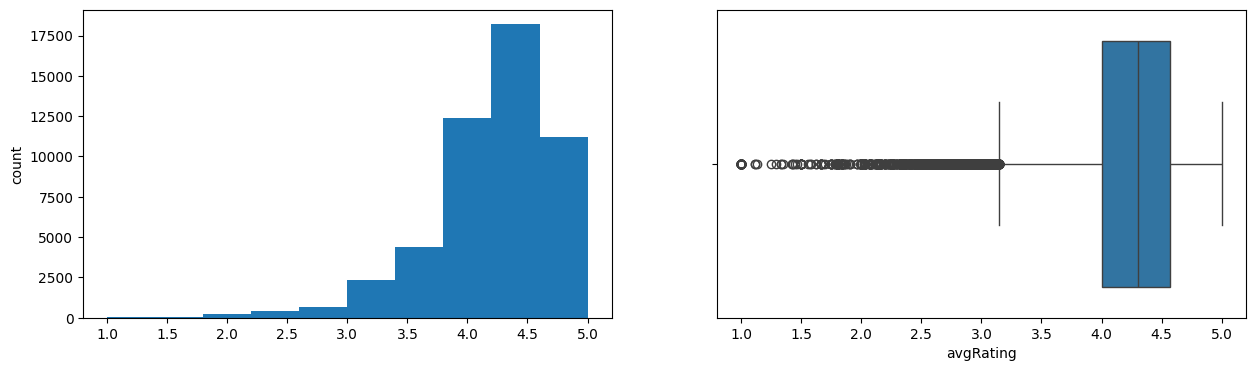

In [18]:
#Plotting the Numerical Variables
for col in num_cols:
    print(col)
    print('Skew :', round(subset[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    subset[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=subset[col])
    plt.show()

In [19]:
# Replace empty strings with 'Unknown'
subset['review/summary'] = subset['review/summary'].replace('', 'Unknown')

# Replace NaN values with 'Unknown' as before
subset['review/summary'] = subset['review/summary'].fillna('Unknown')

Pre-trained Vader model for Sentiment Analysis

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze the sentiment of the review
def get_sentiment_category(review):
    # Get the sentiment score from VADER
    sentiment_score = analyzer.polarity_scores(review)['compound']

    # Map sentiment score to sentiment category
    if sentiment_score <= -0.5:
        return 'Poor'
    elif -0.5 < sentiment_score <= 0:
        return 'Average'
    elif 0 < sentiment_score <= 0.5:
        return 'Good'
    elif 0.5 < sentiment_score <= 0.75:
        return 'Very Good'
    else:
        return 'Must Read'

# Apply the function to the reviews column
subset['sentiment_category'] = subset['review/summary'].apply(get_sentiment_category)

# View the DataFrame with sentiment categories
print(subset[['Title', 'review/summary', 'sentiment_category']])


                                                     Title  \
2945667  A Christmas Carol, in Prose: Being a Ghost Sto...   
2352586                                Priest Kings of Gor   
1531260  Earth Angels: A Pocket Guide for Incarnated An...   
941910                       The Fascinating King's Gambit   
2582125  THE RED BADGE OF COURAGE: AN EPISODE OF THE AM...   
...                                                    ...   
1333972                              Operations Management   
62331                                             Betrayed   
1229382                                  Little fur family   
1298893                                Crime & punishment;   
2862993  The Fabric of the Cosmos: Space, Time, and the...   

                                            review/summary sentiment_category  
2945667                   Best reading of Dicken's classic          Very Good  
2352586                                    No Bugs Milady?            Average  
1531260        

In [21]:

# Function to map ratings to sentiment categories
def categorize_rating(avgRating):
    if avgRating <= 1:
        return 'Poor'
    elif avgRating < 2 and avgRating > 1:
        return 'Average'
    elif avgRating < 3 and avgRating > 2:
        return 'Good'
    elif avgRating < 4 and avgRating > 3:
        return 'Very Good'
    elif avgRating <= 5 and avgRating > 4:
        return 'Must Read'

# Apply the categorization function to the rating column
subset['sentiment_rating_category'] = subset['avgRating'].apply(categorize_rating)

# View the DataFrame
print(subset[['Title', 'avgRating', 'sentiment_rating_category']])

rating_df = subset[['Title', 'avgRating' , 'sentiment_rating_category', 'review/summary', 'sentiment_category']]

                                                     Title  avgRating  \
2945667  A Christmas Carol, in Prose: Being a Ghost Sto...   4.686391   
2352586                                Priest Kings of Gor   3.904762   
1531260  Earth Angels: A Pocket Guide for Incarnated An...   4.119048   
941910                       The Fascinating King's Gambit   3.833333   
2582125  THE RED BADGE OF COURAGE: AN EPISODE OF THE AM...   3.624413   
...                                                    ...        ...   
1333972                              Operations Management   4.375000   
62331                                             Betrayed   4.122807   
1229382                                  Little fur family   4.645833   
1298893                                Crime & punishment;   4.393321   
2862993  The Fabric of the Cosmos: Space, Time, and the...   4.482993   

        sentiment_rating_category  
2945667                 Must Read  
2352586                 Very Good  
1531260        

In [22]:
# Assigning values to specific columns in rating_df using .loc[]
rating_df.loc[:, 'Genre'] = subset['categories']
rating_df.loc[:, 'Author'] = subset['authors']

<ipython-input-22-5002a54e2f6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df.loc[:, 'Genre'] = subset['categories']
<ipython-input-22-5002a54e2f6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df.loc[:, 'Author'] = subset['authors']


In [23]:
# Remove brackets and single quotes from the 'Genre' and 'Author' columns using .loc[]
rating_df.loc[:, 'Genre'] = rating_df['Genre'].str.replace(r"[\[\]']", '', regex=True).str.strip()
rating_df.loc[:, 'Author'] = rating_df['Author'].str.replace(r"[\[\]']", '', regex=True).str.strip()

In [24]:
# Step 1: Create a mapping of authors to their known genres
# Group by author and aggregate genres into a list
author_genre_map = rating_df.groupby('Author')['Genre'].agg(lambda x: x.mode()[0] if not x.mode().empty else pd.NA).reset_index()

# Step 2: Create a dictionary from the mapping
author_genre_dict = {row['Author']: row['Genre'] for index, row in author_genre_map.iterrows() if row['Genre'] != 'Unknown'}

# Step 3: Fill unknown values in the 'Genre' column using .loc[]
def fill_unknown_genre(row):
    if row['Genre'] == 'Unknown':
        author = row['Author']
        if author in author_genre_dict:
            return author_genre_dict[author]
    return row['Genre']

# Apply the function using .loc[] to avoid the warning
rating_df.loc[:, 'Genre'] = rating_df.apply(fill_unknown_genre, axis=1)

In [25]:
rating_df.sort_values(by = "avgRating", ascending = False)

,Title,avgRating,sentiment_rating_category,review/summary,sentiment_category,Genre,Author
1272280,The Keystone Kid: Tales of Early Hollywood,5.0,Must Read,Awesome book about Hollywood History!,Very Good,Performing Arts,Coy Watson
1228711,Racquetball Today,5.0,Must Read,Best technique,Very Good,Sports & Recreation,"Lynn Adams, Erwin Goldbloom"
521395,The happy orpheline,5.0,Must Read,1st in a Series of 2--Lively tale of a French ...,Average,France,Natalie Savage Carlson
1992341,No Man Stands Alone: The True Story of Barney ...,5.0,Must Read,Incredible guts of a true champion,Must Read,Drug addiction,"Barney Ross, Martin Abramson"
2894943,Three to zero;: The story of the birth and dea...,5.0,Must Read,An unexpected study in union politics.,Average,American newspapers,Joseph Sage
...,...,...,...,...,...,...,...
1597845,Another Story: A Novella,1.0,Poor,Unreadable,Average,Fiction,Tatiana de Rosnay
2745446,"1,000 Crazy Jokes for Kids",1.0,Poor,Can you give NO STAR?,Average,English wit and humor,Michael Johnstone
2649487,Cigar Bizarre: An Unusual History,1.0,Poor,Read the description carefully,Good,Social Science,Philip Collins
1772059,The Art of Gelato: Italian Desserts and Pastries,1.0,Poor,"Fans of non-fat powdered milk, rejoice!",Good,Cooking,Francisco Daniele


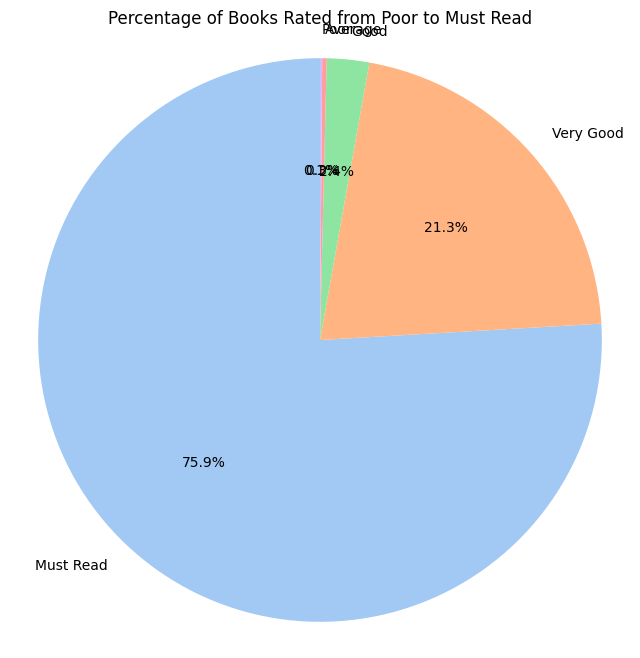

In [26]:
# Count the occurrences of each sentiment category
sentiment_counts = rating_df['sentiment_rating_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Percentage of Books Rated from Poor to Must Read')
plt.axis('equal')
plt.show()

Recommender System

In [27]:
ordinal_map = { 'Poor' : 1, 'Average' : 2, 'Good' : 3, 'Very Good' : 4, 'Must Read' : 5}

In [28]:
# Ensure that the replacement produces integers, and then cast to a compatible dtype
rating_df.loc[:, 'Rating_Ordinal'] = rating_df['sentiment_rating_category'].replace(ordinal_map).astype(float)

# Display the DataFrame to verify the changes
rating_df

<ipython-input-28-c1bbde17aa8f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rating_df.loc[:, 'Rating_Ordinal'] = rating_df['sentiment_rating_category'].replace(ordinal_map).astype(float)
<ipython-input-28-c1bbde17aa8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df.loc[:, 'Rating_Ordinal'] = rating_df['sentiment_rating_category'].replace(ordinal_map).astype(float)


,Title,avgRating,sentiment_rating_category,review/summary,sentiment_category,Genre,Author,Rating_Ordinal
2945667,"A Christmas Carol, in Prose: Being a Ghost Sto...",4.686391,Must Read,Best reading of Dicken's classic,Very Good,Unknown,Unknown,5.0
2352586,Priest Kings of Gor,3.904762,Very Good,No Bugs Milady?,Average,Fiction,John Norman,4.0
1531260,Earth Angels: A Pocket Guide for Incarnated An...,4.119048,Must Read,explains a lot,Average,Unknown,Unknown,5.0
941910,The Fascinating King's Gambit,3.833333,Very Good,"Good Content, Poor Production",Average,Games,Thomas Johansson,4.0
2582125,THE RED BADGE OF COURAGE: AN EPISODE OF THE AM...,3.624413,Very Good,repetitious and needless words,Average,Unknown,Unknown,4.0
...,...,...,...,...,...,...,...,...
1333972,Operations Management,4.375000,Must Read,Great condition,Very Good,Business & Economics,William J Stevenson,5.0
62331,Betrayed,4.122807,Must Read,For the christian and Jew alike,Average,Literary Collections,Milan Kundera,5.0
1229382,Little fur family,4.645833,Must Read,Small hands - BIG heart,Very Good,Unknown,Unknown,5.0
1298893,Crime & punishment;,4.393321,Must Read,"Buying it was my Crime, Reading it was my Puni...",Poor,Unknown,Unknown,5.0


In [29]:
# Create an ordinal mapping for genres
genre_mapping = {genre: idx for idx, genre in enumerate(rating_df['Genre'].unique())}
rating_df['Genre_Encoded'] = rating_df['Genre'].map(genre_mapping)

<ipython-input-29-0ff86d59b902>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['Genre_Encoded'] = rating_df['Genre'].map(genre_mapping)


In [30]:
rating_df

,Title,avgRating,sentiment_rating_category,review/summary,sentiment_category,Genre,Author,Rating_Ordinal,Genre_Encoded
2945667,"A Christmas Carol, in Prose: Being a Ghost Sto...",4.686391,Must Read,Best reading of Dicken's classic,Very Good,Unknown,Unknown,5.0,0
2352586,Priest Kings of Gor,3.904762,Very Good,No Bugs Milady?,Average,Fiction,John Norman,4.0,1
1531260,Earth Angels: A Pocket Guide for Incarnated An...,4.119048,Must Read,explains a lot,Average,Unknown,Unknown,5.0,0
941910,The Fascinating King's Gambit,3.833333,Very Good,"Good Content, Poor Production",Average,Games,Thomas Johansson,4.0,2
2582125,THE RED BADGE OF COURAGE: AN EPISODE OF THE AM...,3.624413,Very Good,repetitious and needless words,Average,Unknown,Unknown,4.0,0
...,...,...,...,...,...,...,...,...,...
1333972,Operations Management,4.375000,Must Read,Great condition,Very Good,Business & Economics,William J Stevenson,5.0,7
62331,Betrayed,4.122807,Must Read,For the christian and Jew alike,Average,Literary Collections,Milan Kundera,5.0,106
1229382,Little fur family,4.645833,Must Read,Small hands - BIG heart,Very Good,Unknown,Unknown,5.0,0
1298893,Crime & punishment;,4.393321,Must Read,"Buying it was my Crime, Reading it was my Puni...",Poor,Unknown,Unknown,5.0,0


In [31]:
from sklearn.metrics.pairwise import cosine_similarity

# Sample a smaller subset for testing
sampled_df = rating_df.sample(n=50000, random_state=42)  # Adjust sample size as necessary
pivot_table = sampled_df.pivot_table(index='Title', columns='Genre_Encoded', values='Rating_Ordinal').fillna(0)
item_similarity = cosine_similarity(pivot_table)


# Create a DataFrame for similarity scores
similarity_df = pd.DataFrame(item_similarity, index=pivot_table.index, columns=pivot_table.index)

In [32]:
def recommend_books_by_genre(genre, sampled_df, similarity_df, genre_mapping, top_n=10):
    if genre not in genre_mapping:
        return "Genre not found."

    # Get the encoded genre value
    encoded_genre = genre_mapping[genre]

    # Filter books of the selected genre
    genre_books = sampled_df[sampled_df['Genre_Encoded'] == encoded_genre]

    if genre_books.empty:
        return "No books found for this genre."

    # Get recommendations based on the first book in the genre
    recommendations = similarity_df.loc[genre_books['Title'].iloc[0]].sort_values(ascending=False)

    # Exclude books already in the genre
    recommendations = recommendations[~recommendations.index.isin(genre_books['Title'])]

    return recommendations.head(top_n).index.tolist()


In [64]:
while True:
    user_genre = input("Enter a genre (or type 'exit' to quit): ").strip()

    if user_genre.lower() == 'exit':
        break

    recommended_books = recommend_books_by_genre(user_genre, sampled_df, similarity_df, genre_mapping)

    if isinstance(recommended_books, list):
        print(f"Top recommendations for '{user_genre}':")
        for book in recommended_books:
            print(f"- {book}")
    else:
        print(recommended_books)



Enter a genre (or type 'exit' to quit): Fiction
Top recommendations for 'Fiction':
- The American Boulangerie: Authentic French Pastries and Breads for the Home Kitchen
- The Bearded Dragon: An Owner's Guide to a Happy Healthy Pet
- The Amber Room
- Recovering the Lost Tools of Learning : An Approach to Distinctively Christian Education (Turning Point Christian Worldview Ser.)
- The Amazing Liver & Gallbladder Flush
- The Amazing Power of Deliberate Intent 4-CD: Part I: Living the Art of Allowing (Pt. 1)
- Remote Viewing Secrets: A Handbook
- Real Life, Real Love: 7 Paths to a Strong, Lasting Relationship
- Rebels & Devils: The Psychology of Liberation
- The Beginning And the End
Enter a genre (or type 'exit' to quit): Unknown
Top recommendations for 'Unknown':
- Ten Ever-Lovin' Years With Pogo
- Ten Lessons to Transform Your Marriage: America's Love Lab Experts Share Their Strategies for Strengthening Your Relationship
- Tennessee Handbook: Including Nashville, Memphis, the Great Smok

In [34]:
rating_df.head()

,Title,avgRating,sentiment_rating_category,review/summary,sentiment_category,Genre,Author,Rating_Ordinal,Genre_Encoded
2945667,"A Christmas Carol, in Prose: Being a Ghost Sto...",4.686391,Must Read,Best reading of Dicken's classic,Very Good,Unknown,Unknown,5.0,0
2352586,Priest Kings of Gor,3.904762,Very Good,No Bugs Milady?,Average,Fiction,John Norman,4.0,1
1531260,Earth Angels: A Pocket Guide for Incarnated An...,4.119048,Must Read,explains a lot,Average,Unknown,Unknown,5.0,0
941910,The Fascinating King's Gambit,3.833333,Very Good,"Good Content, Poor Production",Average,Games,Thomas Johansson,4.0,2
2582125,THE RED BADGE OF COURAGE: AN EPISODE OF THE AM...,3.624413,Very Good,repetitious and needless words,Average,Unknown,Unknown,4.0,0


In [35]:
rating_df['sentiment_category'].unique()

array(['Very Good', 'Average', 'Good', 'Poor', 'Must Read'], dtype=object)

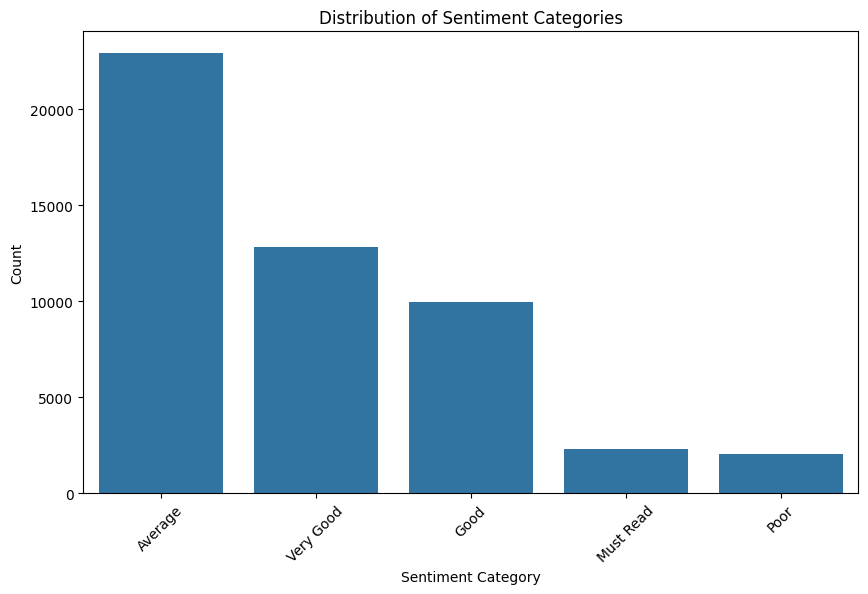

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=rating_df, x='sentiment_category', order=rating_df['sentiment_category'].value_counts().index)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [37]:
sentiment_mapping = {
    'Very Good': 4,
    'Good': 3,
    'Average': 2,
    'Poor': 1,
    'Must Read': 5
}

In [38]:
rating_df['sentiment_categoty_encoded'] = rating_df['sentiment_category'].map(sentiment_mapping)

<ipython-input-38-6b764b52aa16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['sentiment_categoty_encoded'] = rating_df['sentiment_category'].map(sentiment_mapping)


In [39]:
rating_df.head()

,Title,avgRating,sentiment_rating_category,review/summary,sentiment_category,Genre,Author,Rating_Ordinal,Genre_Encoded,sentiment_categoty_encoded
2945667,"A Christmas Carol, in Prose: Being a Ghost Sto...",4.686391,Must Read,Best reading of Dicken's classic,Very Good,Unknown,Unknown,5.0,0,4
2352586,Priest Kings of Gor,3.904762,Very Good,No Bugs Milady?,Average,Fiction,John Norman,4.0,1,2
1531260,Earth Angels: A Pocket Guide for Incarnated An...,4.119048,Must Read,explains a lot,Average,Unknown,Unknown,5.0,0,2
941910,The Fascinating King's Gambit,3.833333,Very Good,"Good Content, Poor Production",Average,Games,Thomas Johansson,4.0,2,2
2582125,THE RED BADGE OF COURAGE: AN EPISODE OF THE AM...,3.624413,Very Good,repetitious and needless words,Average,Unknown,Unknown,4.0,0,2


In [40]:
rating_df

,Title,avgRating,sentiment_rating_category,review/summary,sentiment_category,Genre,Author,Rating_Ordinal,Genre_Encoded,sentiment_categoty_encoded
2945667,"A Christmas Carol, in Prose: Being a Ghost Sto...",4.686391,Must Read,Best reading of Dicken's classic,Very Good,Unknown,Unknown,5.0,0,4
2352586,Priest Kings of Gor,3.904762,Very Good,No Bugs Milady?,Average,Fiction,John Norman,4.0,1,2
1531260,Earth Angels: A Pocket Guide for Incarnated An...,4.119048,Must Read,explains a lot,Average,Unknown,Unknown,5.0,0,2
941910,The Fascinating King's Gambit,3.833333,Very Good,"Good Content, Poor Production",Average,Games,Thomas Johansson,4.0,2,2
2582125,THE RED BADGE OF COURAGE: AN EPISODE OF THE AM...,3.624413,Very Good,repetitious and needless words,Average,Unknown,Unknown,4.0,0,2
...,...,...,...,...,...,...,...,...,...,...
1333972,Operations Management,4.375000,Must Read,Great condition,Very Good,Business & Economics,William J Stevenson,5.0,7,4
62331,Betrayed,4.122807,Must Read,For the christian and Jew alike,Average,Literary Collections,Milan Kundera,5.0,106,2
1229382,Little fur family,4.645833,Must Read,Small hands - BIG heart,Very Good,Unknown,Unknown,5.0,0,4
1298893,Crime & punishment;,4.393321,Must Read,"Buying it was my Crime, Reading it was my Puni...",Poor,Unknown,Unknown,5.0,0,1


In [42]:
rating_df

,Title,avgRating,sentiment_rating_category,review/summary,sentiment_category,Genre,Author,Rating_Ordinal,Genre_Encoded,sentiment_categoty_encoded
2945667,"A Christmas Carol, in Prose: Being a Ghost Sto...",4.686391,Must Read,Best reading of Dicken's classic,Very Good,Unknown,Unknown,5.0,0,4
2352586,Priest Kings of Gor,3.904762,Very Good,No Bugs Milady?,Average,Fiction,John Norman,4.0,1,2
1531260,Earth Angels: A Pocket Guide for Incarnated An...,4.119048,Must Read,explains a lot,Average,Unknown,Unknown,5.0,0,2
941910,The Fascinating King's Gambit,3.833333,Very Good,"Good Content, Poor Production",Average,Games,Thomas Johansson,4.0,2,2
2582125,THE RED BADGE OF COURAGE: AN EPISODE OF THE AM...,3.624413,Very Good,repetitious and needless words,Average,Unknown,Unknown,4.0,0,2
...,...,...,...,...,...,...,...,...,...,...
1333972,Operations Management,4.375000,Must Read,Great condition,Very Good,Business & Economics,William J Stevenson,5.0,7,4
62331,Betrayed,4.122807,Must Read,For the christian and Jew alike,Average,Literary Collections,Milan Kundera,5.0,106,2
1229382,Little fur family,4.645833,Must Read,Small hands - BIG heart,Very Good,Unknown,Unknown,5.0,0,4
1298893,Crime & punishment;,4.393321,Must Read,"Buying it was my Crime, Reading it was my Puni...",Poor,Unknown,Unknown,5.0,0,1


In [45]:
rating_df.isnull().sum()

,0
Title,4
avgRating,0
sentiment_rating_category,1805
review/summary,0
sentiment_category,0
Genre,0
Author,0
Rating_Ordinal,1805
Genre_Encoded,0
sentiment_categoty_encoded,0


In [50]:
# rating_df['sentiment_rating_category'].dropna(inplace = True)
# rating_df['Rating_Ordinal'].dropna(inplace = True)

rating_df.dropna(subset=['sentiment_rating_category', 'Rating_Ordinal'], inplace=True)


<ipython-input-50-c25d3714cdbc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df.dropna(subset=['sentiment_rating_category', 'Rating_Ordinal'], inplace=True)


In [62]:
rating_df

,Title,avgRating,sentiment_rating_category,review/summary,sentiment_category,Genre,Author,Rating_Ordinal,Genre_Encoded,sentiment_categoty_encoded
2945667,"A Christmas Carol, in Prose: Being a Ghost Sto...",4.686391,Must Read,Best reading of Dicken's classic,Very Good,Unknown,Unknown,5.0,0,4
2352586,Priest Kings of Gor,3.904762,Very Good,No Bugs Milady?,Average,Fiction,John Norman,4.0,1,2
1531260,Earth Angels: A Pocket Guide for Incarnated An...,4.119048,Must Read,explains a lot,Average,Unknown,Unknown,5.0,0,2
941910,The Fascinating King's Gambit,3.833333,Very Good,"Good Content, Poor Production",Average,Games,Thomas Johansson,4.0,2,2
2582125,THE RED BADGE OF COURAGE: AN EPISODE OF THE AM...,3.624413,Very Good,repetitious and needless words,Average,Unknown,Unknown,4.0,0,2
...,...,...,...,...,...,...,...,...,...,...
1333972,Operations Management,4.375000,Must Read,Great condition,Very Good,Business & Economics,William J Stevenson,5.0,7,4
62331,Betrayed,4.122807,Must Read,For the christian and Jew alike,Average,Literary Collections,Milan Kundera,5.0,106,2
1229382,Little fur family,4.645833,Must Read,Small hands - BIG heart,Very Good,Unknown,Unknown,5.0,0,4
1298893,Crime & punishment;,4.393321,Must Read,"Buying it was my Crime, Reading it was my Puni...",Poor,Unknown,Unknown,5.0,0,1


In [51]:
rating_df.isnull().sum()

,0
Title,4
avgRating,0
sentiment_rating_category,0
review/summary,0
sentiment_category,0
Genre,0
Author,0
Rating_Ordinal,0
Genre_Encoded,0
sentiment_categoty_encoded,0


In [52]:
feature_columns = ['avgRating', 'Rating_Ordinal', 'Genre_Encoded', 'sentiment_categoty_encoded']
X = rating_df[feature_columns].drop(['Rating_Ordinal'], axis = 1)
y = rating_df['Rating_Ordinal']

In [53]:
X

,avgRating,Genre_Encoded,sentiment_categoty_encoded
2945667,4.686391,0,4
2352586,3.904762,1,2
1531260,4.119048,0,2
941910,3.833333,2,2
2582125,3.624413,0,2
...,...,...,...
1333972,4.375000,7,4
62331,4.122807,106,2
1229382,4.645833,0,4
1298893,4.393321,0,1


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X.isnull().sum()

,0
avgRating,0
Genre_Encoded,0
sentiment_categoty_encoded,0


In [56]:
X = X.dropna()
y = y[X.index]

In [57]:
X.isnull().sum()

,0
avgRating,0
Genre_Encoded,0
sentiment_categoty_encoded,0


In [58]:
y = y.dropna()

In [59]:
y.isnull().sum()

0

In [60]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (48195, 3)
y shape: (48195,)


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

         1.0       0.92      0.92      0.92        13
         2.0       0.96      0.90      0.93        30
         3.0       0.99      1.00      1.00       228
         4.0       1.00      1.00      1.00      2020
         5.0       1.00      1.00      1.00      7348

    accuracy                           1.00      9639
   macro avg       0.98      0.96      0.97      9639
weighted avg       1.00      1.00      1.00      9639

Accuracy: 0.9995850191928624


In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.9996628280942007
